# Stochastic Gradient Descent Logic

Finding the global optimum in a multi-dimensional loss function through traditional gradient descent is fraught with challenges. It's hard to ascertain if the discovered minimum is the global one or even a satisfactory solution, primarily because the outcome of the gradient descent method depends heavily on its initial position. Stochastic Gradient Descent (SGD) introduces a novel approach by integrating randomness into the gradient at every step to address this issue.

Despite this randomness, the algorithm ensures an overall movement downhill, though the specific direction taken at each step may not align with the steepest descent path and could occasionally lead to an upward movement. Such a mechanism allows SGD the flexibility to leap from one "valley" in the loss function landscape to another.

The operational core of SGD involves selecting a random subset of the data, termed a minibatch, at each iteration to calculate the gradient. This process adjusts the model parameters $\phi_t$ at every step $t$ according to the following update mechanism:

$$\phi_{t+1} \leftarrow \phi_t - \alpha \cdot \sum_{i \in B_t} \frac{\partial \ell_i(\phi_t)}{\partial \phi}$$

- $B_t$: set containing the indices of the input/output pairs in the current batch
- $\alpha$: learning rate

Data batches are typically selected without repetition, and the algorithm iterates over the training dataset until all data have been utilized, after which it recommences sampling from the complete dataset. Completing one iteration over the entire dataset is known as an epoch.

SGD is distinguished by several advantageous characteristics:

- By injecting noise into its path, it ensures consistent improvements in fitting a data subset at every iteration.
- It treats all training examples equally by drawing them without replacement and covering the entire dataset iteratively.
- Computing gradients from a data subset is less resource-intensive.
- The potential to escape local minima is enhanced.
- The likelihood of avoiding entrapment near saddle points increases, as there's a good chance that some batches will possess a significant gradient at any loss function point.
- A common practice with SGD is to implement a learning rate schedule, starting with a higher learning rate $\alpha$ that diminishes by a predetermined factor after every N epochs.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [ ]:
np.random.seed(42) # For reproducibility

In [ ]:
sample = 2*np.random.rand(100,1)
groundTruth = 4+3*sample+np.random.randn(100,1) # y = 4 + 3x + Gaussian noise
print(f"Sample shape: {sample.shape}")
print(f"Ground Truth shape: {groundTruth.shape}")

Sample shape: (100, 1)
Ground Truth shape: (100, 1)


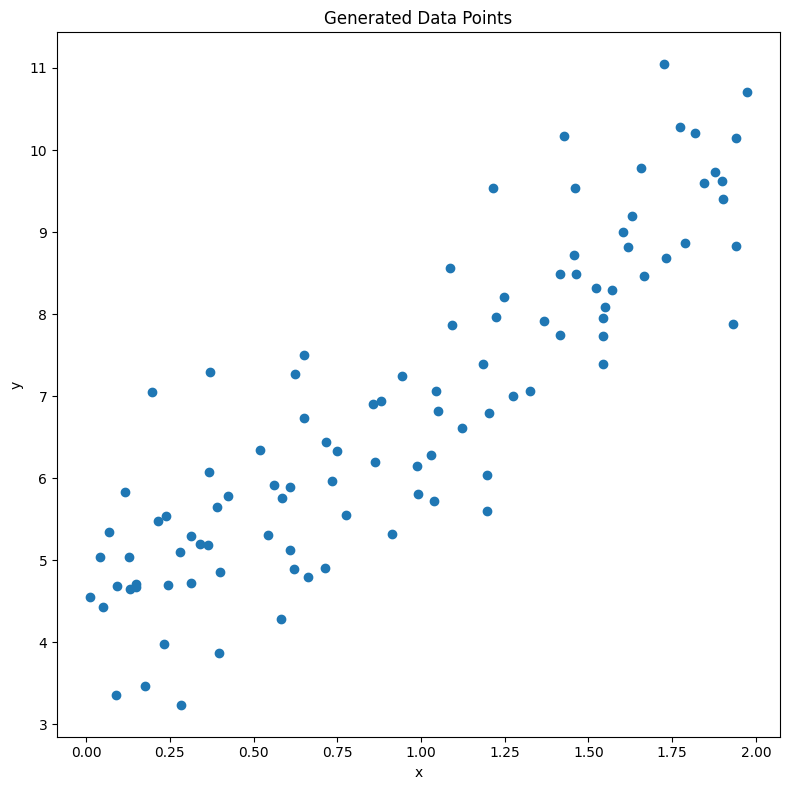

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Generated Data Points")
plt.scatter(sample,groundTruth)
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()

In [ ]:
initialSlope = 0
initialIntercept = 0

In [ ]:
learningRate = 0.01
iterations = 1000
batchSize = 20
count = len(sample)

In [ ]:
# implement SGD
for idx in range(iterations):
  batchIdx = np.random.choice(count,batchSize) # Randomly selecting indices for the batch
  sampleBatch = sample[batchIdx]
  groundBatch = groundTruth[batchIdx]
  # Predicting with current parameters
  predictions = initialSlope*sampleBatch+initialIntercept
  gradient_m = -2*np.sum((groundBatch-predictions)*sampleBatch)/batchSize
  gradient_b = -2*np.sum(groundBatch-predictions)/batchSize
  # Updating parameters
  initialSlope -= learningRate*gradient_m
  initialIntercept -= learningRate*gradient_b
  # Optional: Compute and print the loss every 100 iterations
  if idx % 100 == 0:
    loss = np.sum((groundBatch-predictions)**2)/batchSize
    print(f"Iterations: {idx}: Loss --> {loss}")

Iterations: 0: Loss --> 46.250148213652835
Iterations: 100: Loss --> 0.8108022745117843
Iterations: 200: Loss --> 0.9115220879604479
Iterations: 300: Loss --> 1.248543788279679
Iterations: 400: Loss --> 1.0234527511821865
Iterations: 500: Loss --> 0.7825988801485573
Iterations: 600: Loss --> 1.3831579579052158
Iterations: 700: Loss --> 0.7968561199835492
Iterations: 800: Loss --> 0.5662565183528487
Iterations: 900: Loss --> 0.7009416692283111


In [ ]:
print(f"Final Parameters:\nslope (m) = {initialSlope} | intercept (b) = {initialIntercept}")

Final Parameters:
slope (m) = 2.8208866627479483 | intercept (b) = 4.185351155386468


In [ ]:
sampleTest = np.linspace(0,2,100).reshape(100,1)
predictionsTest = initialSlope*sampleTest+initialIntercept
print(f"Test sample shape: {sampleTest.shape}")
print(f"Test predictions shape: {predictionsTest.shape}")

Test sample shape: (100, 1)
Test predictions shape: (100, 1)


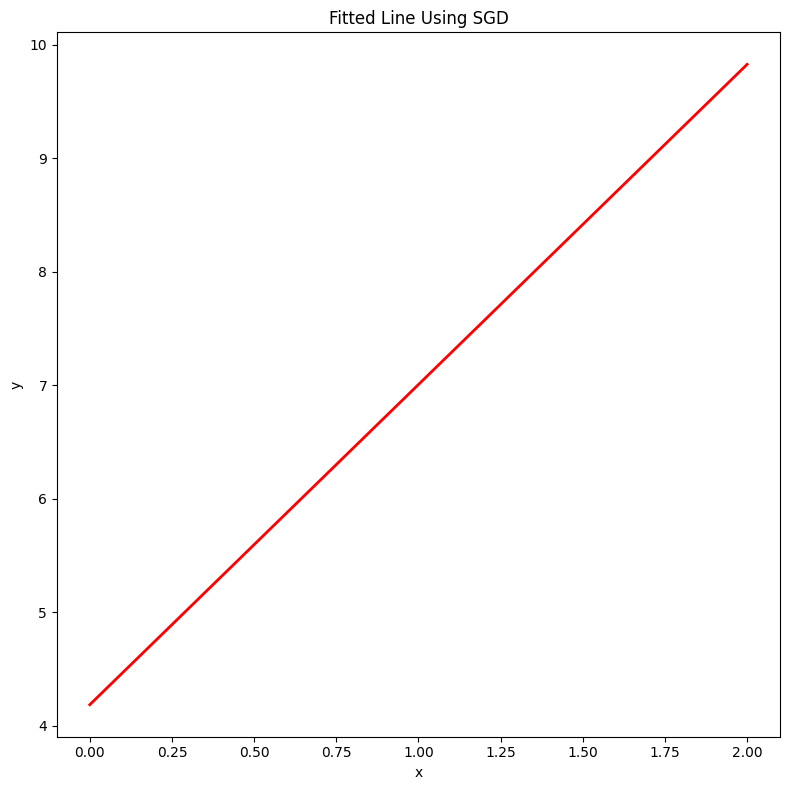

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(sampleTest,predictionsTest,color="red",linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Fitted Line Using SGD")
plt.tight_layout()
plt.show()

- Linear Regression via SGD:

In [ ]:
# Generate synthetic data
np.random.seed(0)
sample = 2*np.random.rand(100,1)
groundTruth = 4+3*sample+np.random.randn(100,1)

In [ ]:
# initialize parameters
theta = np.random.randn(2,1) # Random initialization

In [ ]:
print(f"Theta:\n{theta}")

Theta:
[[-0.35399391]
 [-1.37495129]]


In [ ]:
alpha = 0.1 #learning rate
iterations = 1000
count = len(sample)
batchSize = 20

In [ ]:
for idx in range(iterations):
  shuffledIdx = np.random.permutation(count)
  sampleShuffled = np.c_[np.ones((count,1)),sample[shuffledIdx]] # Add x0 = 1 to each instance
  groundShuffled = groundTruth[shuffledIdx]
  for i in range(0,count,batchSize):
    sample_i = sampleShuffled[i:i+batchSize]
    ground_i = groundShuffled[i:i+batchSize]
    gradients = 2/batchSize*sample_i.T.dot(sample_i.dot(theta)-ground_i)
    theta -= alpha*gradients


In [ ]:
print(f"Optimized Theta:\n{theta}")

Optimized Theta:
[[4.21021974]
 [2.95306829]]


In [ ]:
sampleNew = np.array([[0],[2]])
sampleNew_b = np.c_[np.ones((2,1)),sampleNew] # add x0 = 1 to each instance
predictions = sampleNew_b.dot(theta)

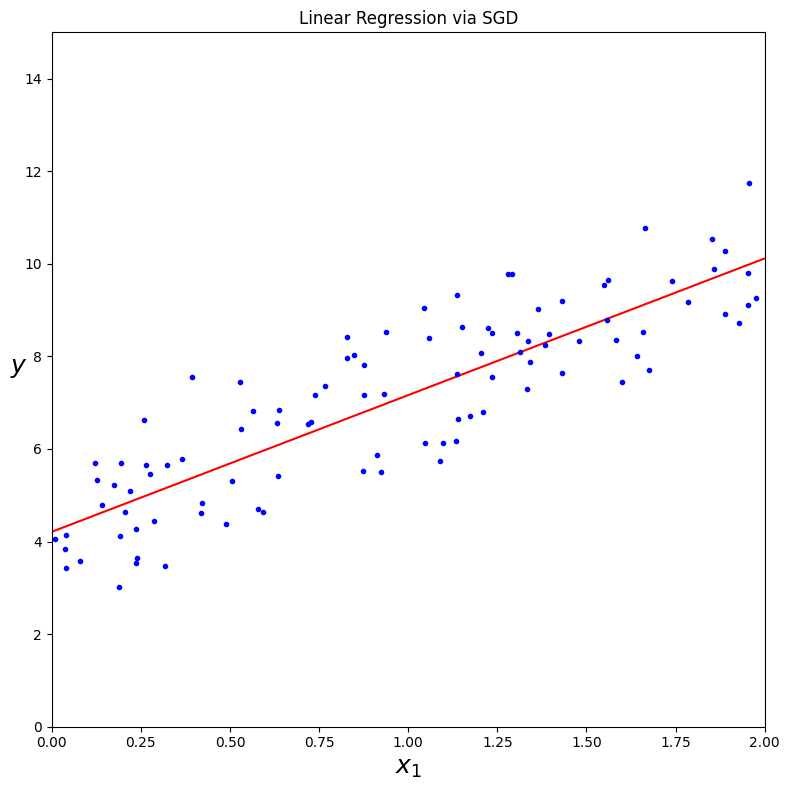

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Linear Regression via SGD")
plt.plot(sampleNew,predictions,"r-")
plt.plot(sample,groundTruth,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.tight_layout()
plt.show()

- complex example:

In [ ]:
data = np.array([[-1.920e+00,-1.422e+01,1.490e+00,-1.940e+00,-2.389e+00,-5.090e+00,
                 -8.861e+00,3.578e+00,-6.010e+00,-6.995e+00,3.634e+00,8.743e-01,
                 -1.096e+01,4.073e-01,-9.467e+00,8.560e+00,1.062e+01,-1.729e-01,
                  1.040e+01,-1.261e+01,1.574e-01,-1.304e+01,-2.156e+00,-1.210e+01,
                 -1.119e+01,2.902e+00,-8.220e+00,-1.179e+01,-8.391e+00,-4.505e+00],
                  [-1.051e+00,-2.482e-02,8.896e-01,-4.943e-01,-9.371e-01,4.306e-01,
                  9.577e-03,-7.944e-02 ,1.624e-01,-2.682e-01,-3.129e-01,8.303e-01,
                  -2.365e-02,5.098e-01,-2.777e-01,3.367e-01,1.927e-01,-2.222e-01,
                  6.352e-02,6.888e-03,3.224e-02,1.091e-02,-5.706e-01,-5.258e-02,
                  -3.666e-02,1.709e-01,-4.805e-02,2.008e-01,-1.904e-01,5.952e-01]])
print(f"Data shape: {data.shape}")

Data shape: (2, 30)


In [ ]:
def ModelPrediction(phiValues:np.ndarray,sample:np.ndarray)->np.ndarray:
  sinComponent = np.sin(phiValues[0]+0.06*phiValues[1]*sample)
  gaussComponent = np.exp(-(phiValues[0]+0.06*phiValues[1]*sample)*(phiValues[0]+0.06*phiValues[1]*sample)/32)
  predictions = sinComponent*gaussComponent
  return predictions

In [ ]:
def DrawModel(data:np.ndarray,model,phiValues:np.ndarray,title:None=None)->None:
  xModel = np.arange(-15,15,0.1)
  yModel = model(phiValues,xModel)
  figure,axs = plt.subplots(figsize=(8,8))
  axs.plot(data[0,:],data[1,:],"bo")
  axs.plot(xModel,yModel,"m-")
  axs.set_xlim([-15,15])
  axs.set_ylim([-1,1])
  axs.set_xlabel("x")
  axs.set_ylabel("y")
  if title is not None:
    axs.set_title(title)
  plt.tight_layout()
  plt.show()


In [ ]:
phi = np.zeros((2,1))
phi[0] = -5
phi[1] = 25
print(f"Phi values:\n{phi}")

Phi values:
[[-5.]
 [25.]]


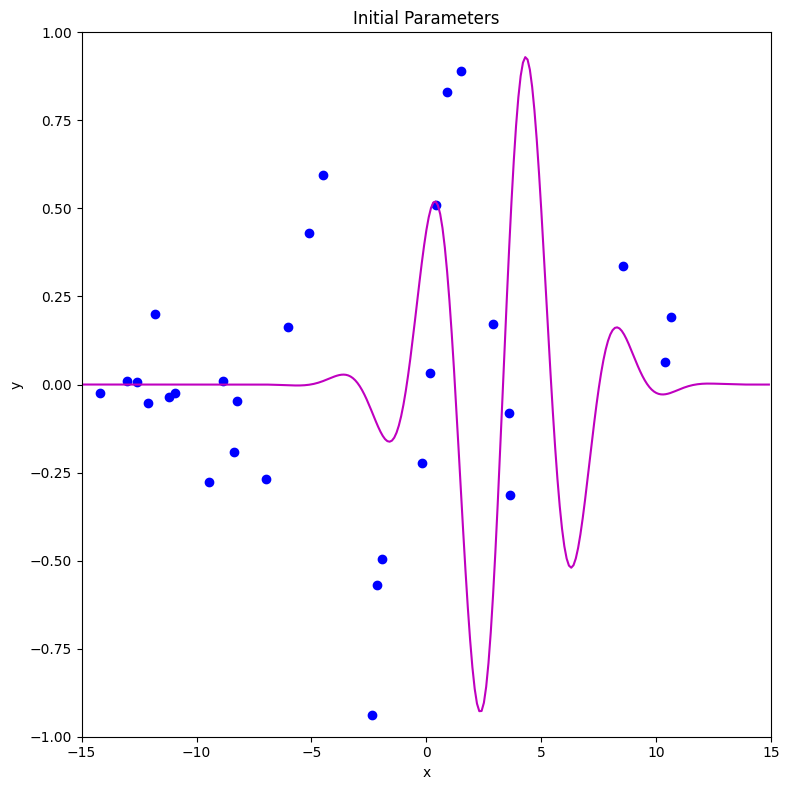

In [ ]:
DrawModel(data,ModelPrediction,phi,"Initial Parameters")

In [ ]:
def ComputeLoss(data:np.ndarray,groundTruth:np.ndarray,model,phiValues:np.ndarray)->int|float:
  predictions = model(phiValues,data)
  diffs = (predictions-groundTruth)**2
  loss = np.sum(diffs)
  return loss

In [ ]:
loss = ComputeLoss(data[0,:],data[1,:],ModelPrediction,np.array([[0.6],[-0.2]]))
print(f"Check: 16.419 | Control --> {loss}")

Check: 16.419 | Control --> 16.41882510762854


In [ ]:
def DrawLossFunctions(computeLoss,data:np.ndarray,model,phiIterations:None=None)->None:
  colorHex = ('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
  colorDec = np.array([int(element,base=16) for element in colorHex])
  r = np.floor(colorDec/(256*256))
  g = np.floor((colorDec-r*256**2)/256)
  b = np.floor(colorDec-r*256**2-g*256)
  colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)
  offsetMesh,freqMesh = np.meshgrid(np.arange(-10,10.0,0.1),np.arange(2.5,22.5,0.1))
  lossMesh = np.zeros_like(freqMesh)
  for slopeIdx,slope in np.ndenumerate(freqMesh):
    lossMesh[slopeIdx] = ComputeLoss(data[0,:],data[1,:],model,np.array([[offsetMesh[slopeIdx]],[slope]]))
  figure,axs = plt.subplots(figsize=(8,8))
  figure.set_size_inches(8,8)
  axs.contourf(offsetMesh,freqMesh,lossMesh,256,cmap=colormap)
  axs.contour(offsetMesh,freqMesh,lossMesh,20,colors=["#80808080"])
  if phiIterations is not None:
    axs.plot(phiIterations[0,:],phiIterations[1,:],"go-")
  axs.set_ylim([2.5,22.5])
  axs.set_xlabel("Offset $\phi_0$")
  axs.set_ylabel("Frequency $\phi_1$")
  plt.tight_layout()
  plt.show()

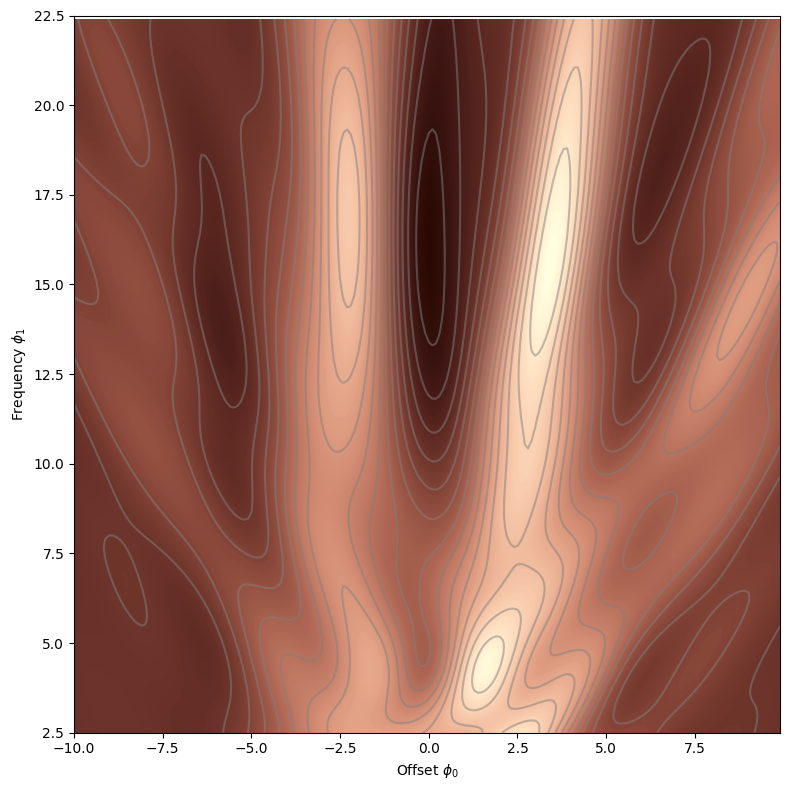

In [ ]:
DrawLossFunctions(ComputeLoss,data,ModelPrediction)

In [ ]:
def GaborDerivationPhi_0(data:np.ndarray,groundTruth:np.ndarray,phi_0:int|float,phi_1:int|float)->int|float:
  x = 0.06*phi_1*data+phi_0
  cosComponent = np.cos(x)
  sinComponent = np.sin(x)
  gaussComponent = np.exp(-0.5*x**2/16)
  derivation = cosComponent*gaussComponent-sinComponent*gaussComponent*x/16
  derivation = 2*derivation*(sinComponent*gaussComponent-groundTruth)
  return np.sum(derivation)

In [ ]:
def GaborDerivationPhi_1(data:np.ndarray,groundTruth:np.ndarray,phi_0:int|float,phi_1:int|float)->int|float:
  x = 0.06*phi_1*data+phi_0
  cosComponent = np.cos(x)
  sinComponent = np.sin(x)
  gaussComponent = np.exp(-0.5*x**2/16)
  derivation = 0.06*data*cosComponent*gaussComponent-0.06*data*sinComponent*gaussComponent*data/16
  derivation = 2*derivation*(sinComponent*gaussComponent-groundTruth)
  return np.sum(derivation)

In [ ]:
def ComputeGradient(data:np.ndarray,groundTruth:np.ndarray,phiValues:np.ndarray)->np.ndarray:
  derivationPhi_0 = GaborDerivationPhi_0(data,groundTruth,phiValues[0],phiValues[1])
  derivationPhi_1 = GaborDerivationPhi_1(data,groundTruth,phiValues[0],phiValues[1])
  return np.array([[derivationPhi_0],[derivationPhi_1]])

In [ ]:
gradient = ComputeGradient(data[0,:],data[1,:],phi)
print(f"Gradient Values:\n\n {gradient}")

Gradient Values:

 [[3.3438051]
 [0.4037952]]


In [ ]:
delta = 0.0001
phi_0_estimation = (
    ComputeLoss(data[0,:],data[1,:],ModelPrediction,phi+np.array([[delta],[0]]))-ComputeLoss(data[0,:],data[1,:],ModelPrediction,phi)
)/delta
phi_1_estimation = (
    ComputeLoss(data[0,:],data[1,:],ModelPrediction,phi+np.array([[0],[delta]]))-ComputeLoss(data[0,:],data[1,:],ModelPrediction,phi)
)/delta
print(f"Approx Gradients:\n {phi_0_estimation} - {phi_1_estimation}")

Approx Gradients:
 3.344025077005597 - 0.5191622526989903


In [ ]:
steps = 21
phiAll = np.zeros((2,steps+1))
phiAll[0,0] = -1.5
phiAll[1,0] = 8.5

In [ ]:
loss = ComputeLoss(data[0,:],data[1,:],ModelPrediction,phiAll[:,0:1])

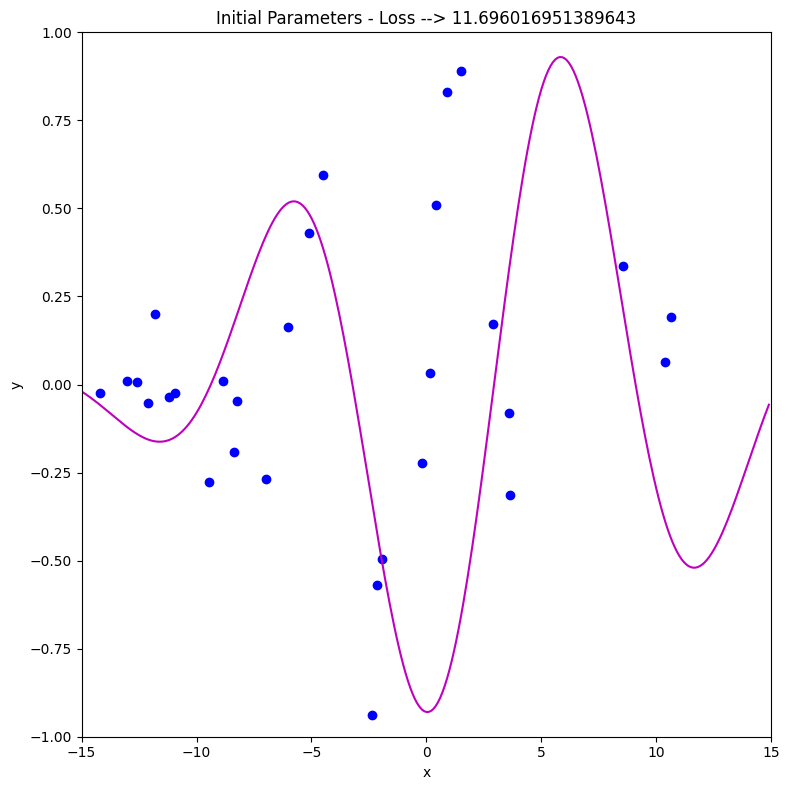

In [ ]:
DrawModel(data,ModelPrediction,phiAll[:,0:1],f"Initial Parameters - Loss --> {loss}")

In [ ]:
def LossFunction1D(distributionProbability:np.ndarray,data:np.ndarray,model,phiStart:int|float,gradient:int|float)->int|float:
  return ComputeLoss(data[0,:],data[1,:],model,phiStart+gradient*distributionProbability)

In [ ]:
def LineSearch(data:np.ndarray,model,phi:np.ndarray,gradient:float|int,threshold:float=0.00001,maxDistance:float=0.1,maxIteration:int=15,verbose:bool=False)->int|float:
  a = 0
  b = 0.33*maxDistance
  c = 0.66*maxDistance
  d = 1.0*maxDistance
  iteration = 0
  while (np.abs(b-c) > threshold) and (iteration < maxIteration):
    iteration += 1
    lossA = LossFunction1D(a,data,model,phi,gradient)
    lossB = LossFunction1D(b,data,model,phi,gradient)
    lossC = LossFunction1D(c,data,model,phi,gradient)
    lossD = LossFunction1D(d,data,model,phi,gradient)
    if verbose:
      print(f"Iteration: {iteration}: a={a},b={b},c={c},d={d}")
      print(f"Loss A: {lossA}, Loss B: {lossB}, Loss C: {lossC}, Loss D: {lossD}")
    if np.argmin((lossA,lossB,lossC,lossD)) == 0:
      b = b/2
      c = c/2
      d = d/2
      continue
    if lossB < lossC:
      d = c
      b = a+(d-a)/3
      c = a+2*(d-a)/3
      continue
    a = b
    b = a+(d-a)/3
    c = a+2*(d-a)/3
  return (b+c)/2.0

In [ ]:
def GradientDescentStep(phi:np.ndarray,data:np.ndarray,model)->np.ndarray:
  gradient = ComputeGradient(data[0,:],data[1,:],phi)
  alpha = LineSearch(data,model,phi,gradient*-1,maxDistance=2.0)
  phi -= alpha*gradient
  return phi

In [ ]:
steps = 21
phiBase = np.zeros((2,steps+1))
phiBase[0,0] = -1.5
phiBase[1,0] = 8.5
print(f"Phi Values Base:\n{phiBase}")

Phi Values Base:
[[-1.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 8.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. ]]


In [ ]:
loss = ComputeLoss(data[0,:],data[1,:],ModelPrediction,phiBase[:,0:1])
print(f"Loss:\n{loss}")

Loss:
11.696016951389643


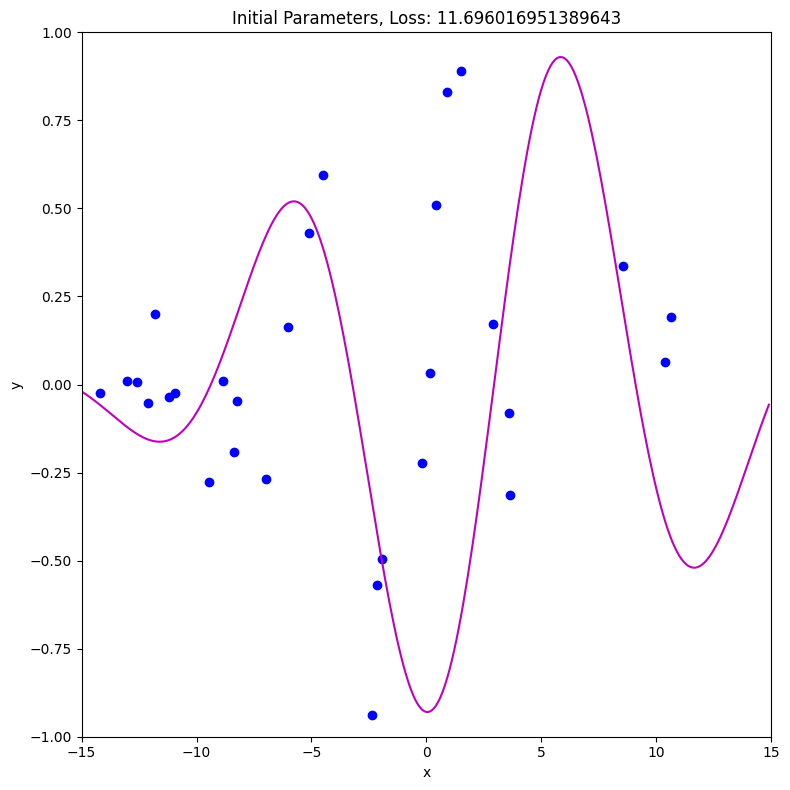

In [ ]:
DrawModel(data,ModelPrediction,phiBase[:,0:1],f"Initial Parameters, Loss: {loss}")

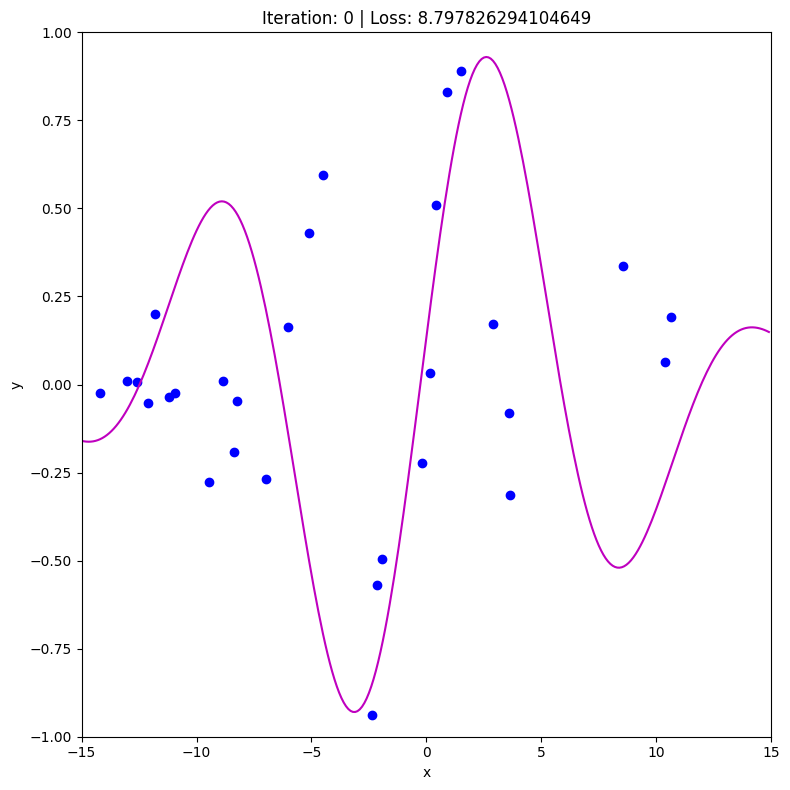

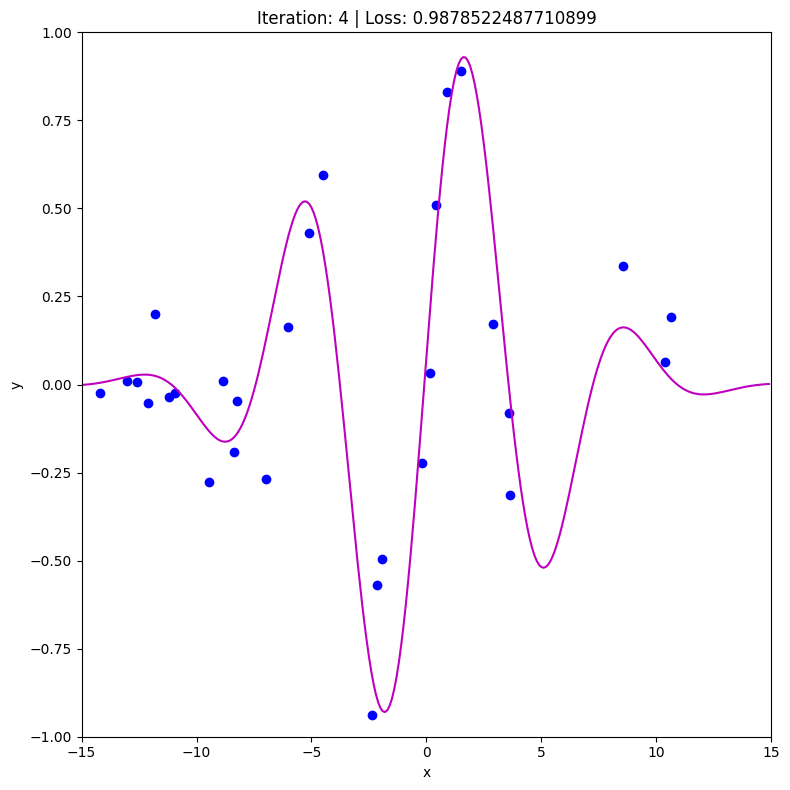

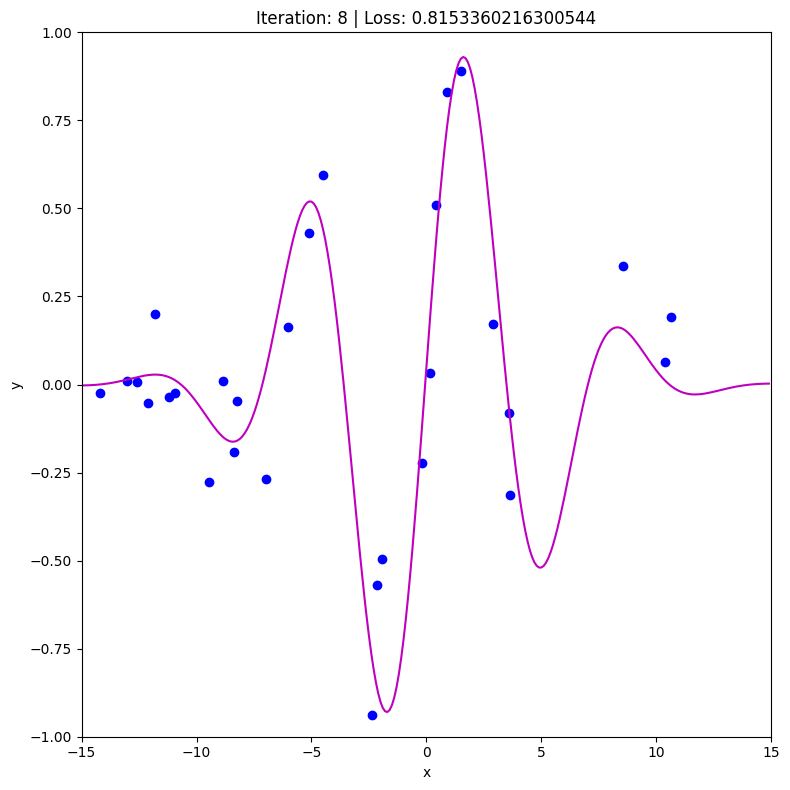

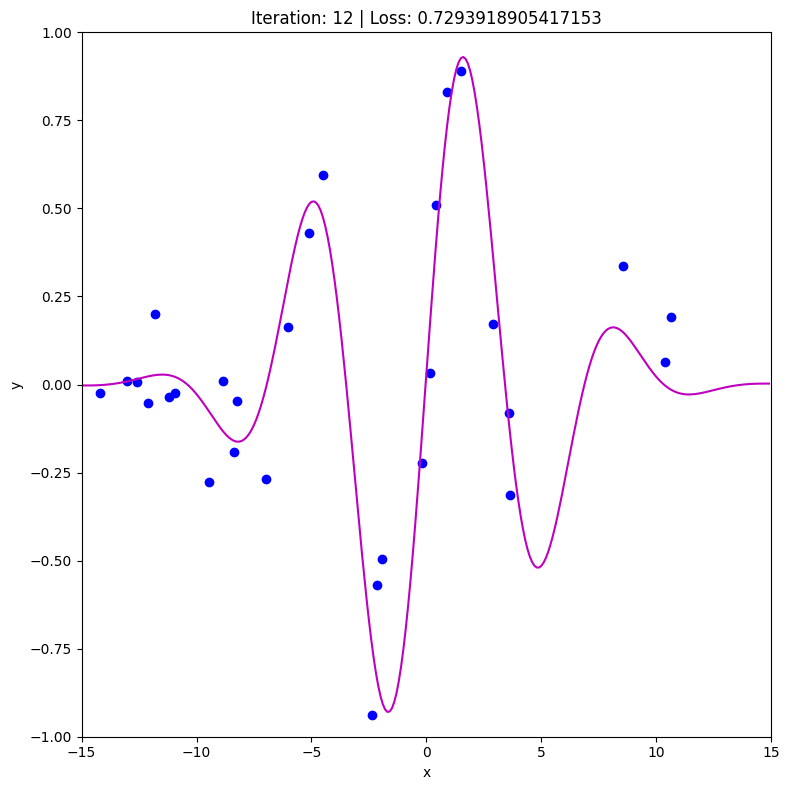

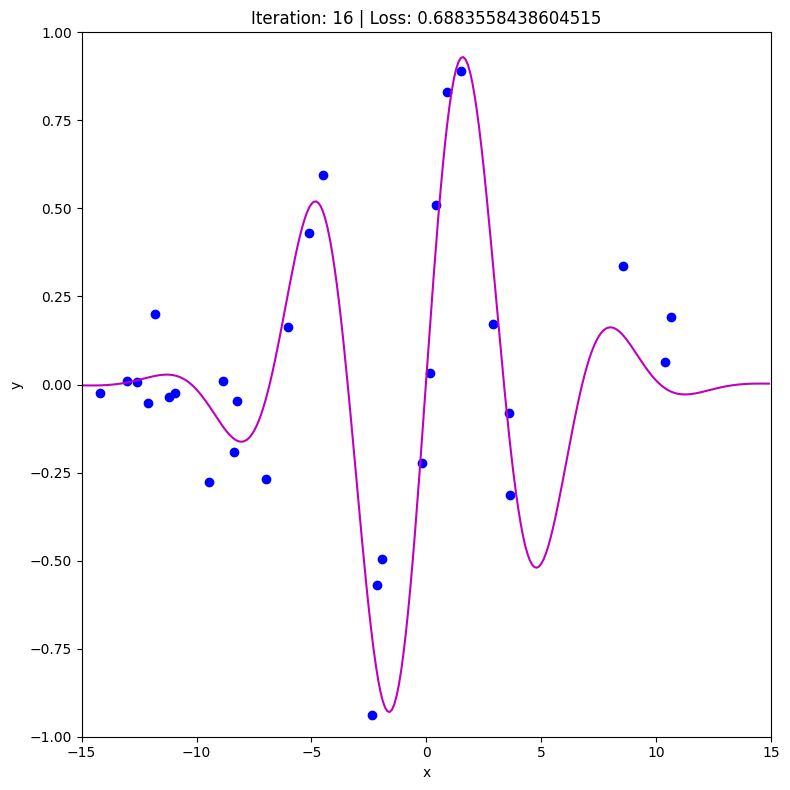

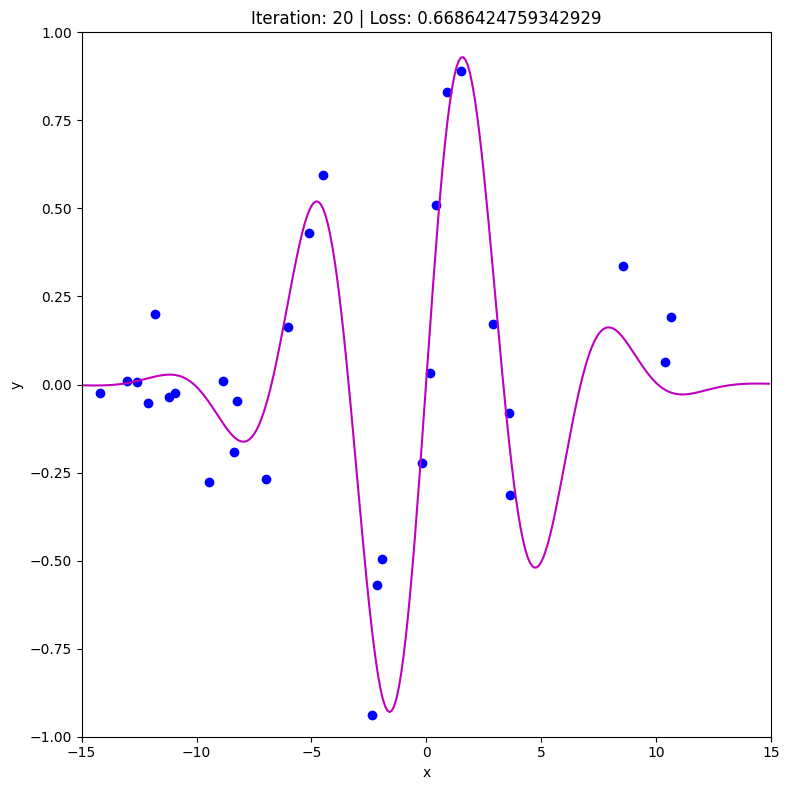

In [ ]:
for idx in range(steps):
  phiBase[:,idx+1:idx+2] = GradientDescentStep(phiBase[:,idx:idx+1],data,ModelPrediction)
  if idx % 4 == 0:
    loss = ComputeLoss(data[0,:],data[1,:],ModelPrediction,phiBase[:,idx+1:idx+2])
    DrawModel(data,ModelPrediction,phiBase[:,idx+1],f"Iteration: {idx} | Loss: {loss}")

In [ ]:
print(f"Phi Values Base:\n{phiBase}")

Phi Values Base:
[[ 1.36557007e-01 -2.76351107e-02  1.02544611e-01 -2.50091604e-02
   8.06777085e-02 -2.47943647e-02  6.35154469e-02 -2.37546758e-02
   5.01819985e-02 -2.24869616e-02  3.99729115e-02 -1.99873754e-02
   3.25099414e-02 -1.61147075e-02  2.66696726e-02 -1.46939021e-02
   2.23531895e-02 -1.12350074e-02  1.91351998e-02 -8.74377659e-03
   1.66403034e-02  1.66403034e-02]
 [ 8.57245600e+00  1.38807498e+01  1.39408596e+01  1.42230342e+01
   1.42713762e+01  1.45116803e+01  1.45509067e+01  1.47536238e+01
   1.47856472e+01  1.49593101e+01  1.49855532e+01  1.51308772e+01
   1.51526344e+01  1.52670357e+01  1.52852190e+01  1.53859456e+01
   1.54011656e+01  1.54797001e+01  1.54926928e+01  1.55558795e+01
   1.55670618e+01  1.55670618e+01]]


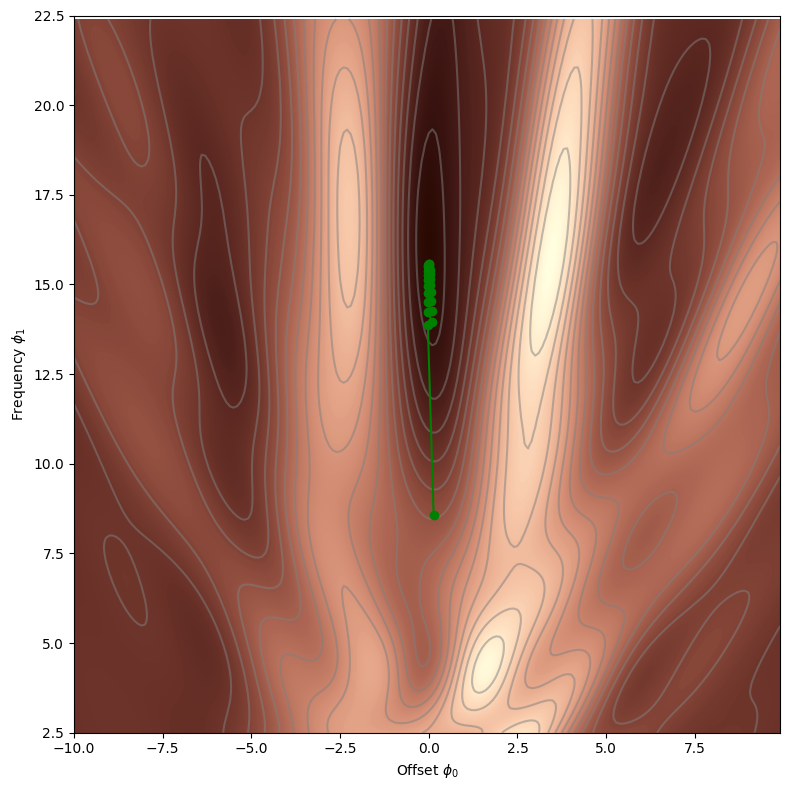

In [ ]:
DrawLossFunctions(ComputeLoss,data,ModelPrediction,phiBase)

In [ ]:
def GradientDescentFixedLearningRate(phi:np.ndarray,data:np.ndarray,alpha:int|float=0.01)->np.ndarray:
  gradient = ComputeGradient(data[0,:],data[1,:],phi)
  phiUpdated = phi-alpha*gradient
  return phiUpdated

In [ ]:
steps = 21
phiAll = np.zeros((2,steps+1))
phiAll[0,0] = -1.5
phiAll[1,0] = 8.5

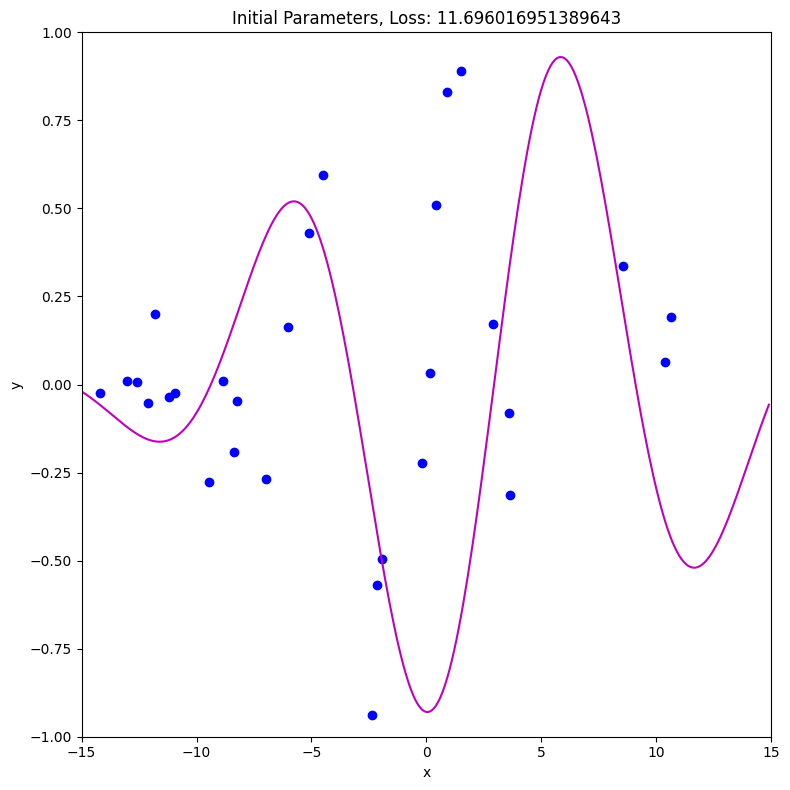

In [ ]:
loss = ComputeLoss(data[0,:],data[1,:],ModelPrediction,phiAll[:,0:1])
DrawModel(data,ModelPrediction,phiAll[:,0:1],f"Initial Parameters, Loss: {loss}")

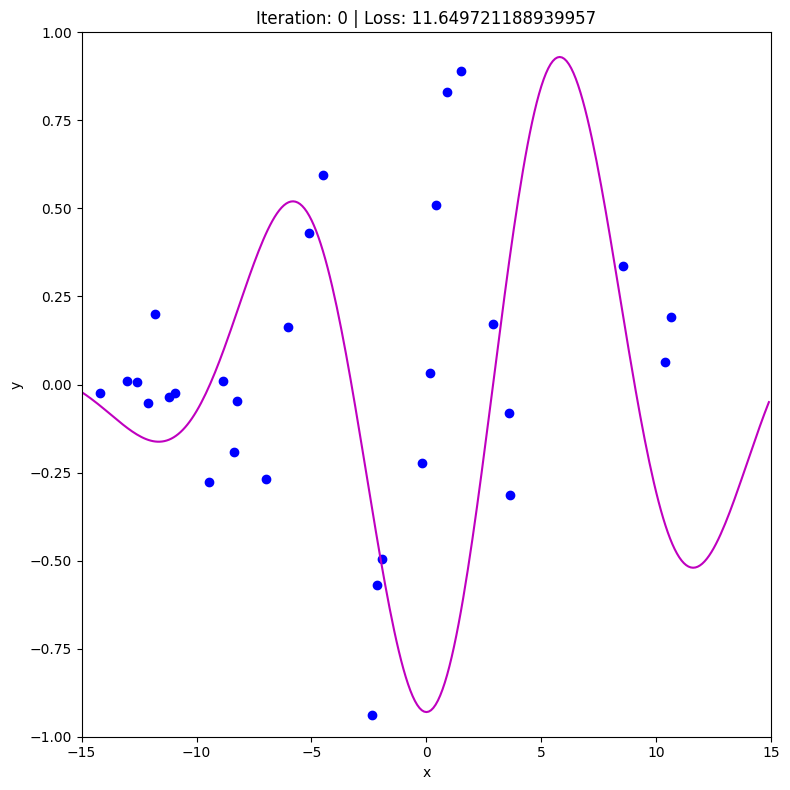

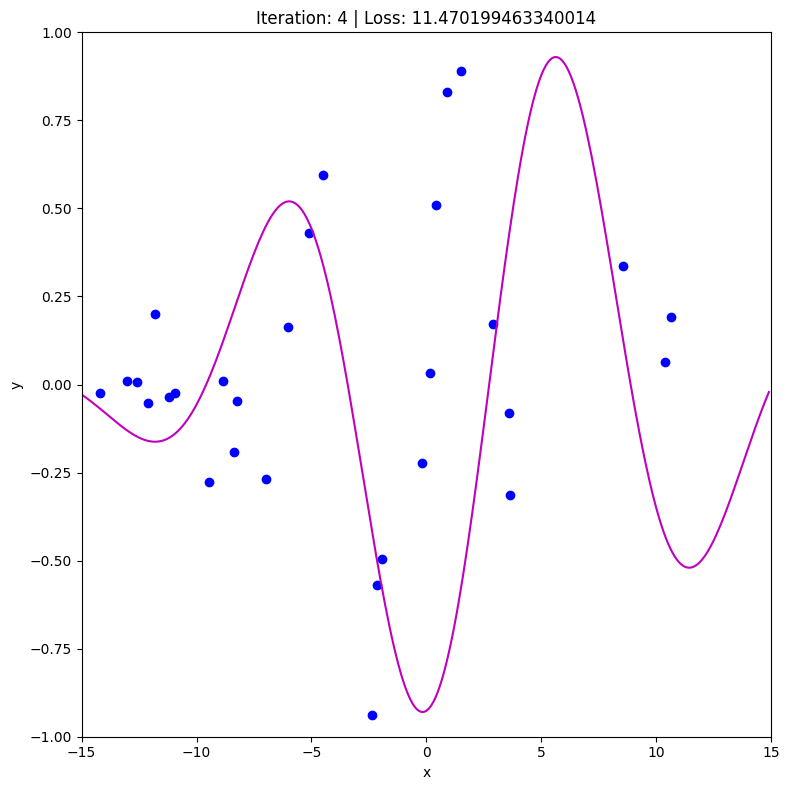

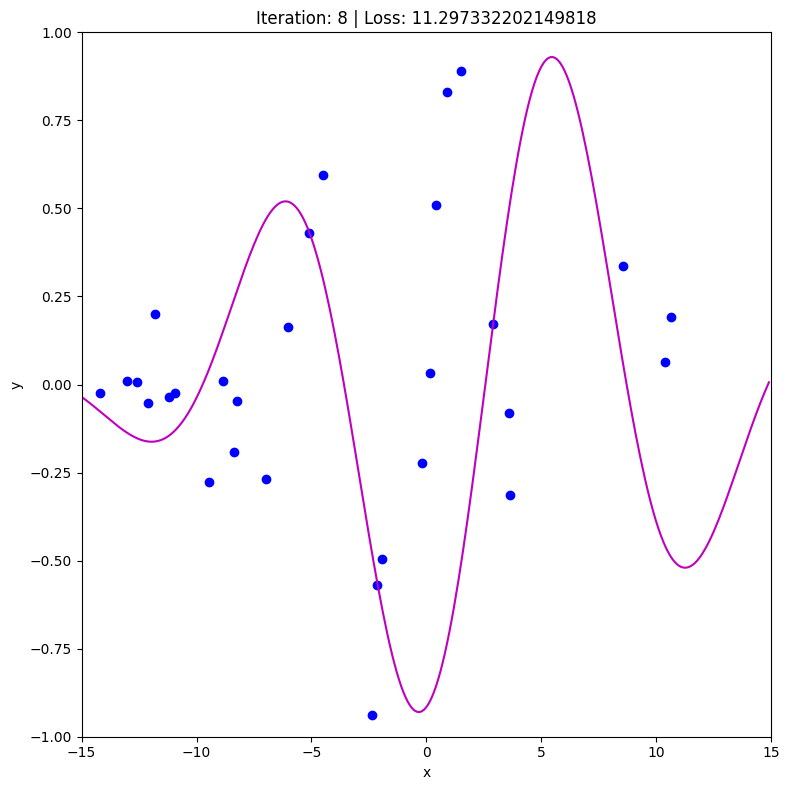

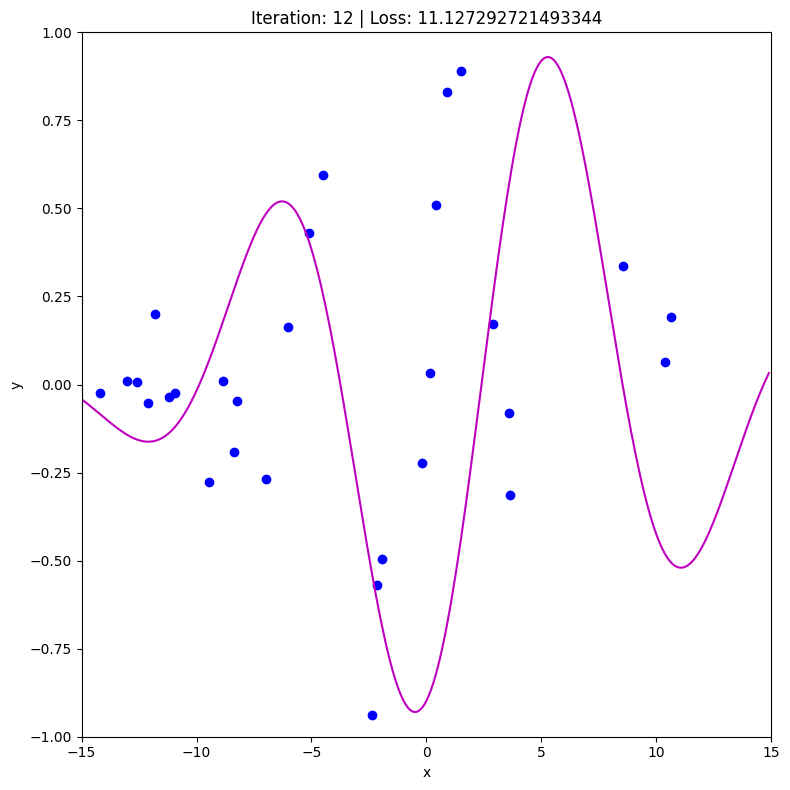

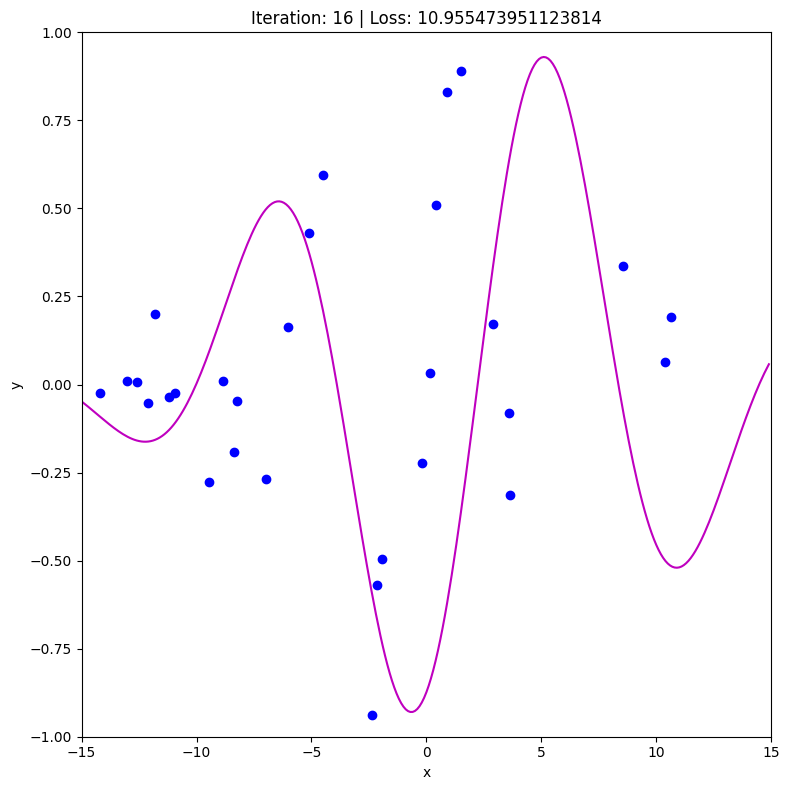

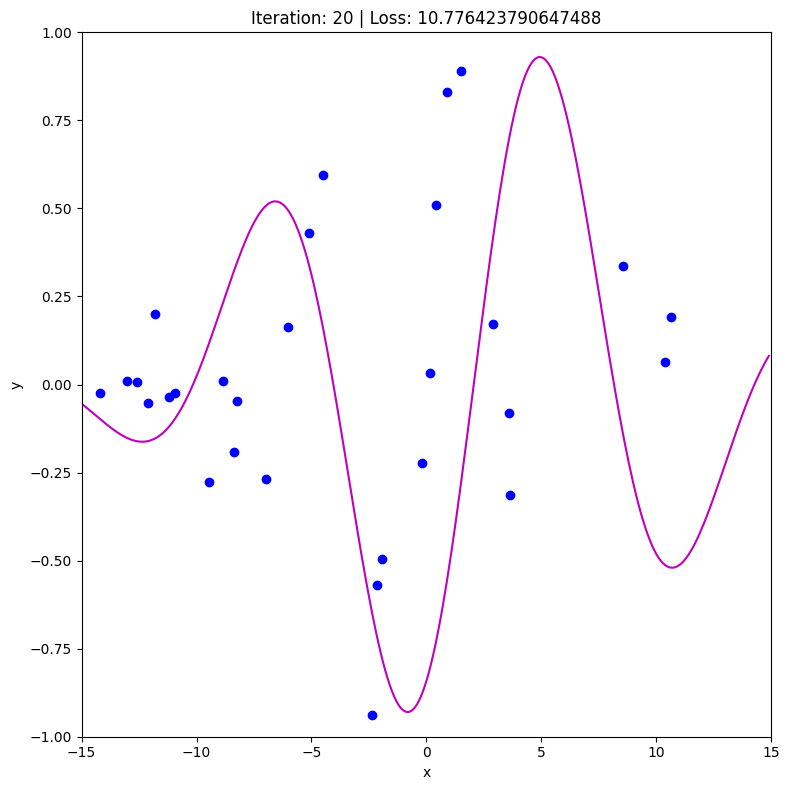

In [ ]:
for idx in range(steps):
  phiAll[:,idx+1:idx+2] = GradientDescentFixedLearningRate(phiAll[:,idx:idx+1],data,alpha=0.01)
  if idx % 4 == 0:
    loss = ComputeLoss(data[0,:],data[1,:],ModelPrediction,phiAll[:,idx+1:idx+2])
    DrawModel(data,ModelPrediction,phiAll[:,idx+1],f"Iteration: {idx} | Loss: {loss}")

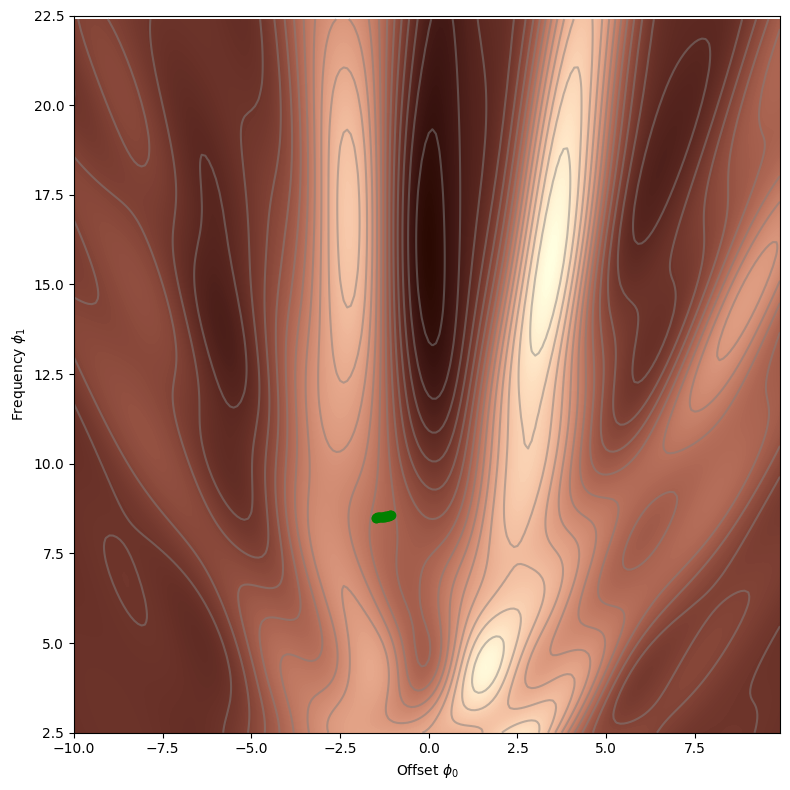

In [ ]:
DrawLossFunctions(ComputeLoss,data,ModelPrediction,phiAll)

In [ ]:
def StochasticGradientDescent(phi:np.ndarray,data:np.ndarray,groundTruth:np.ndarray,alpha:int|float,batchSize:int|float)->np.ndarray:
  dataLength = data.shape[0]
  indices = np.random.permutation(dataLength)[:batchSize]
  batchData = data[indices]
  batchGround = groundTruth[indices]
  gradient = ComputeGradient(batchData,batchGround,phi)
  phiUpdated = phi-alpha*gradient
  return phiUpdated

In [ ]:
np.random.seed(1)
steps = 50
phiBase = np.zeros((2,steps+1))
phiBase[0,0] = 3.5
phiBase[1,0] = 6.5

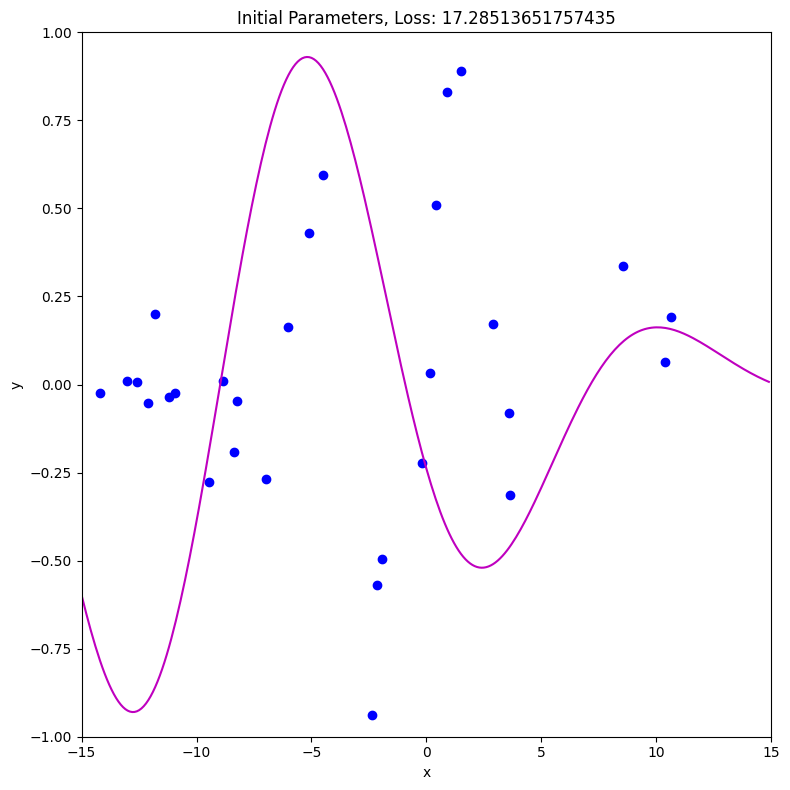

In [ ]:
loss = ComputeLoss(data[0,:],data[1,:],ModelPrediction,phiBase[:,0:1])
DrawModel(data,ModelPrediction,phiBase[:,0:1],f"Initial Parameters, Loss: {loss}")

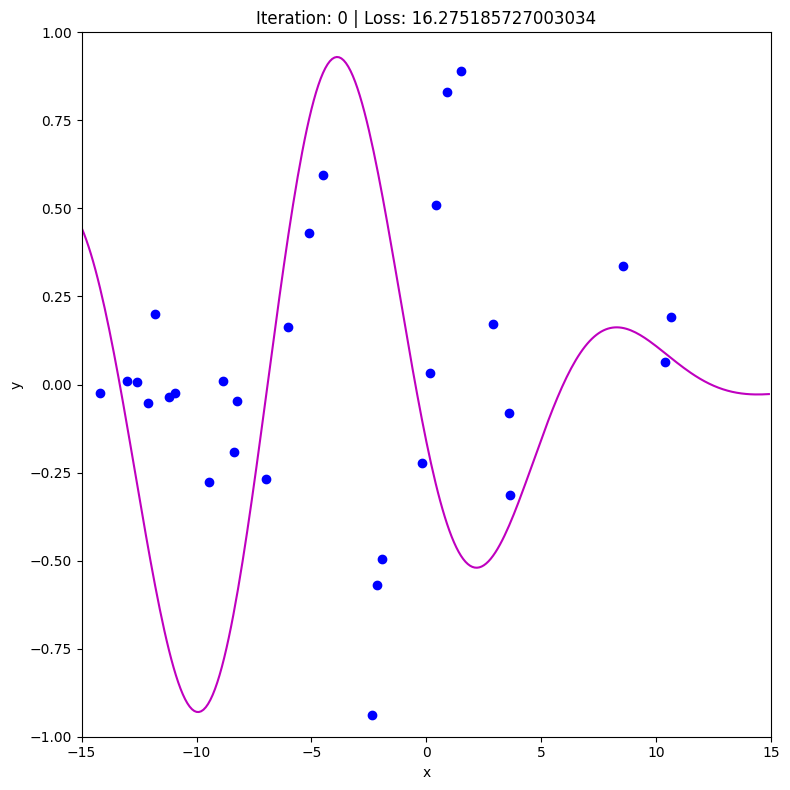

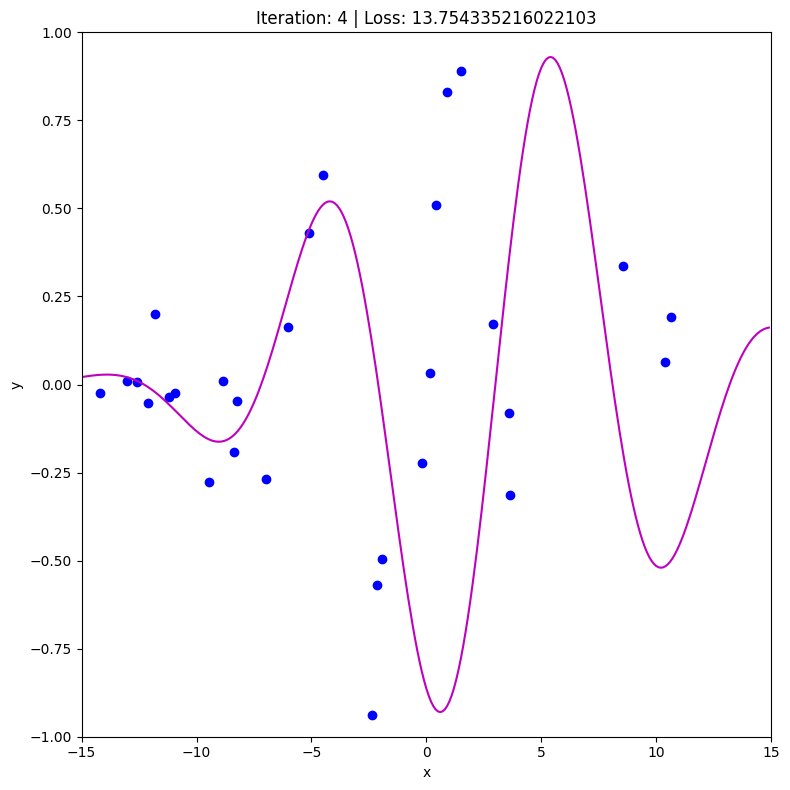

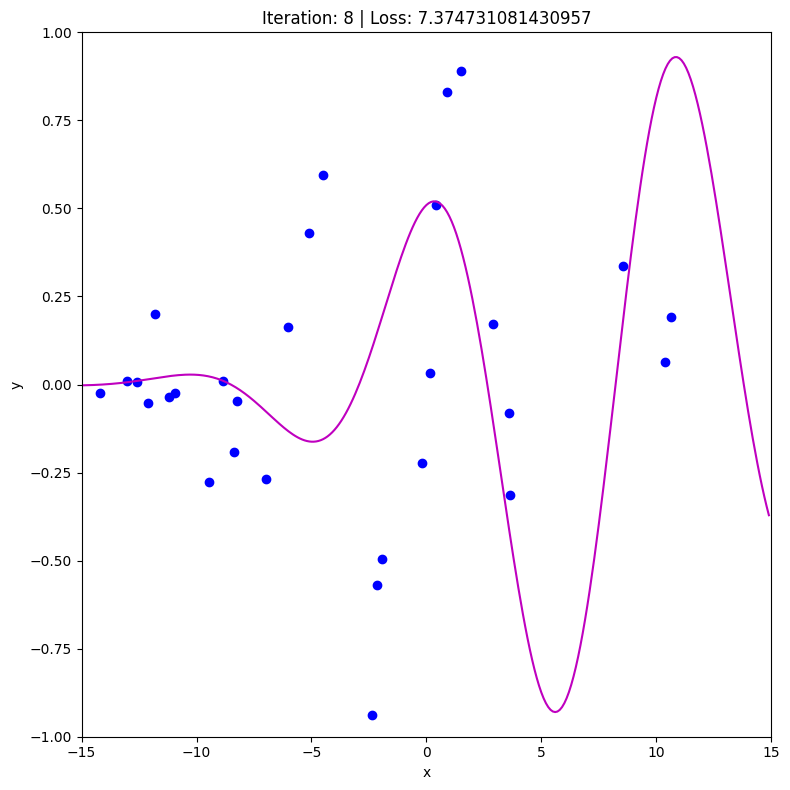

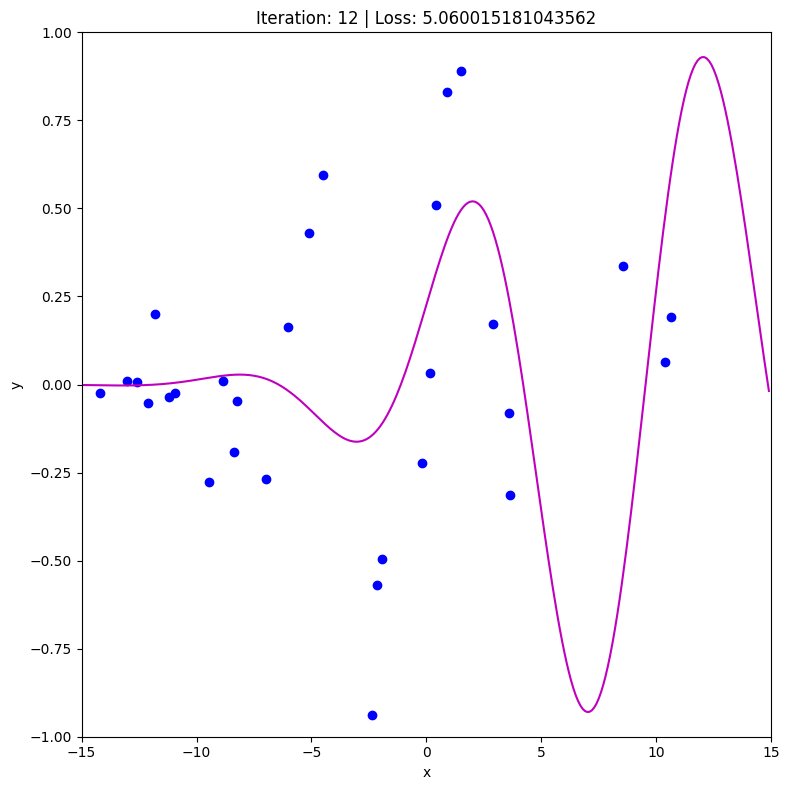

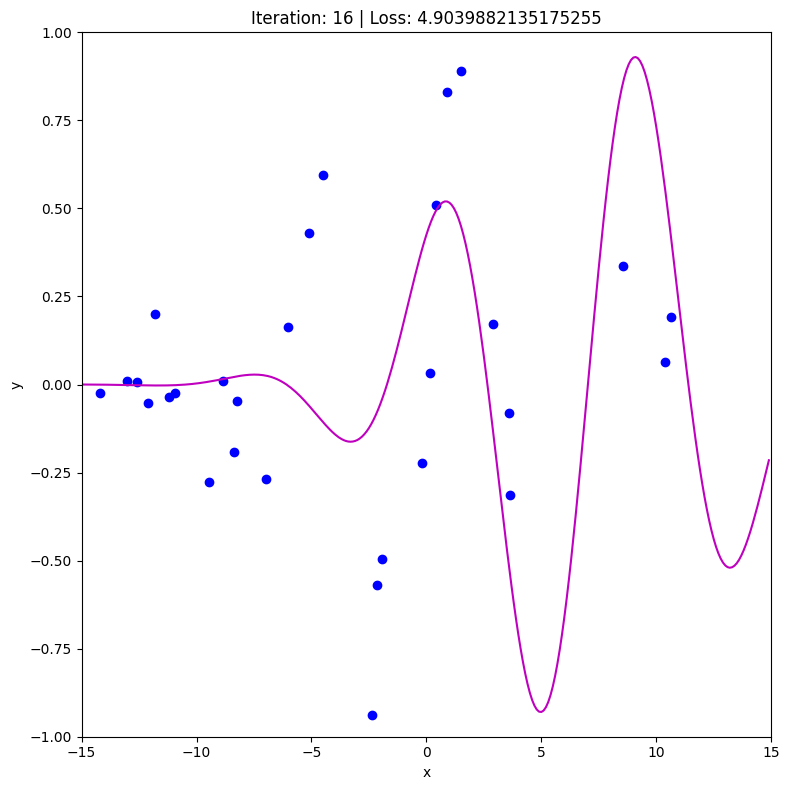

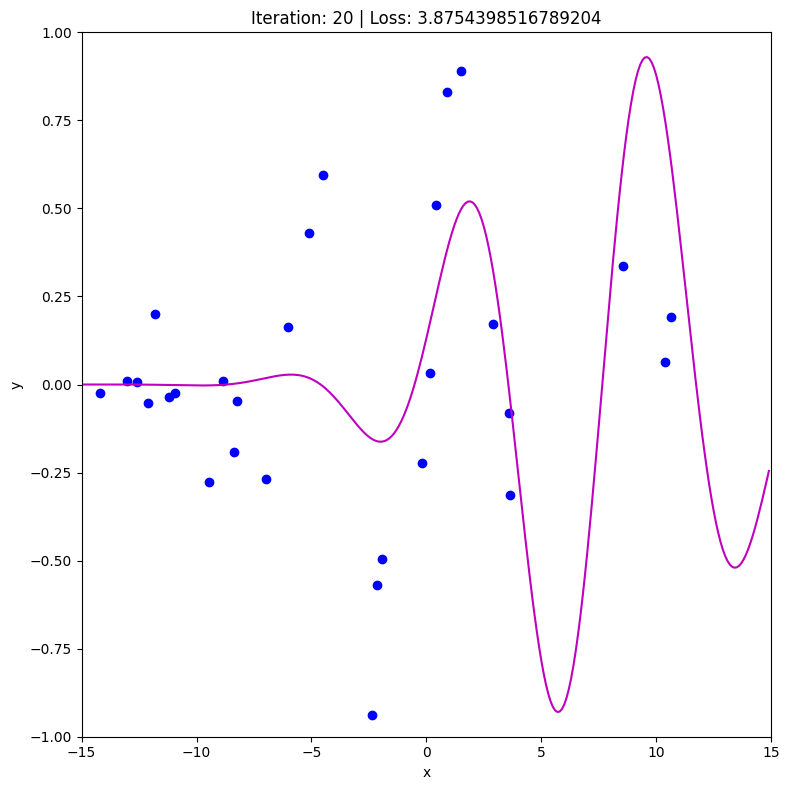

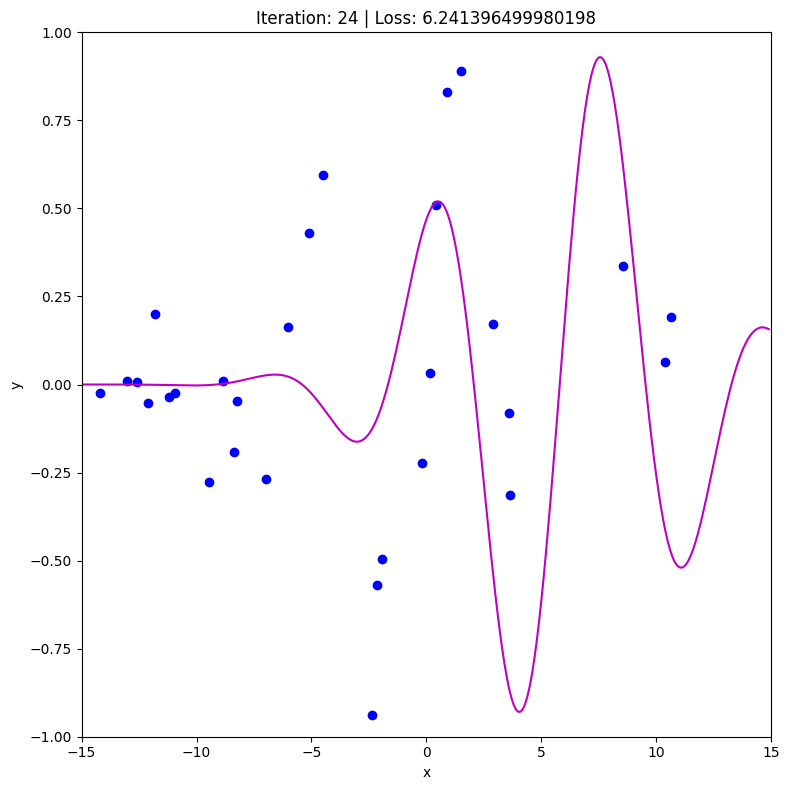

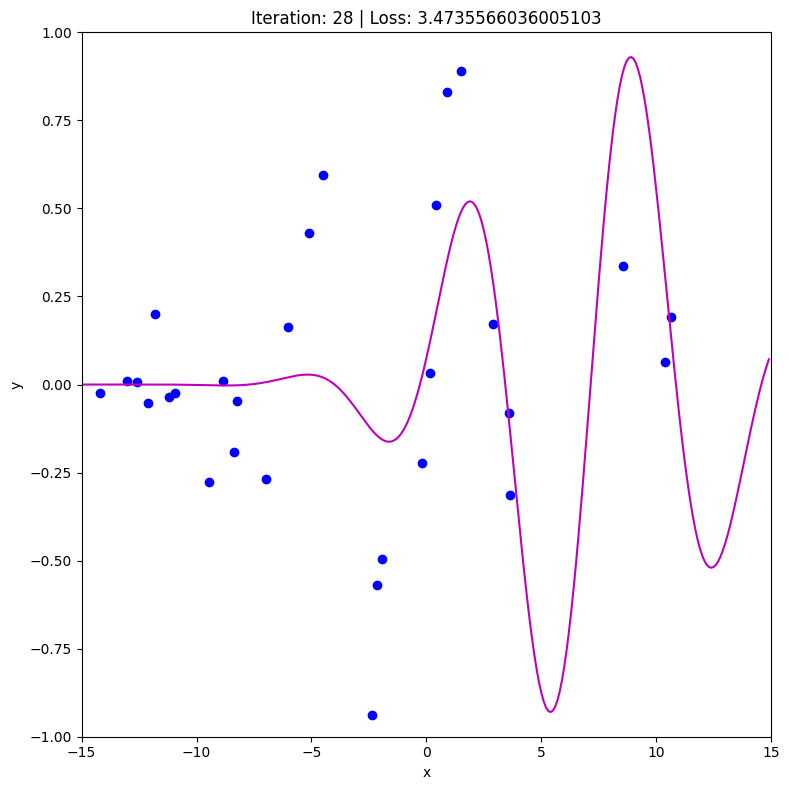

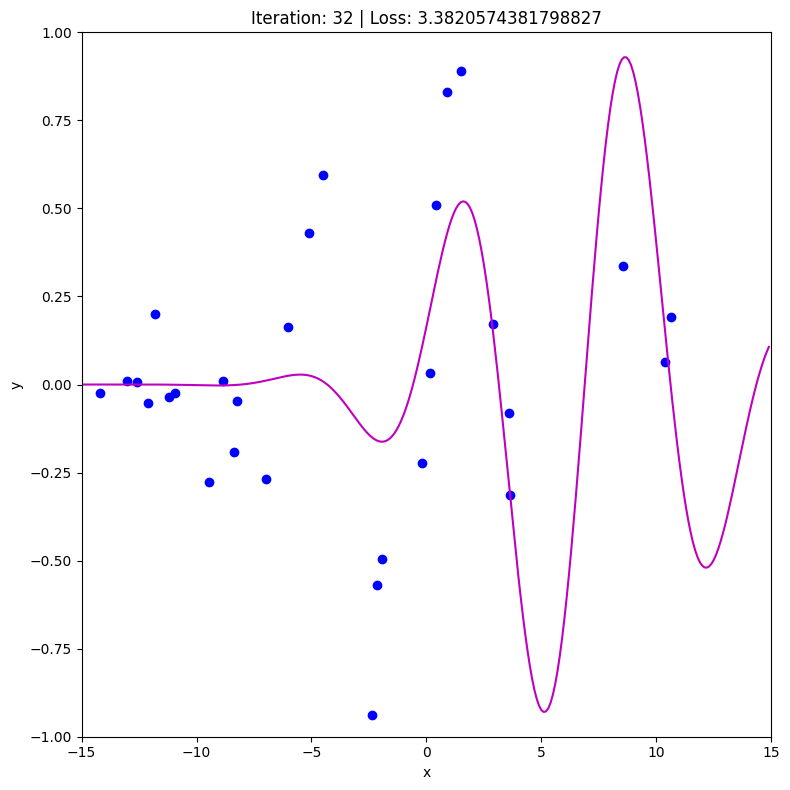

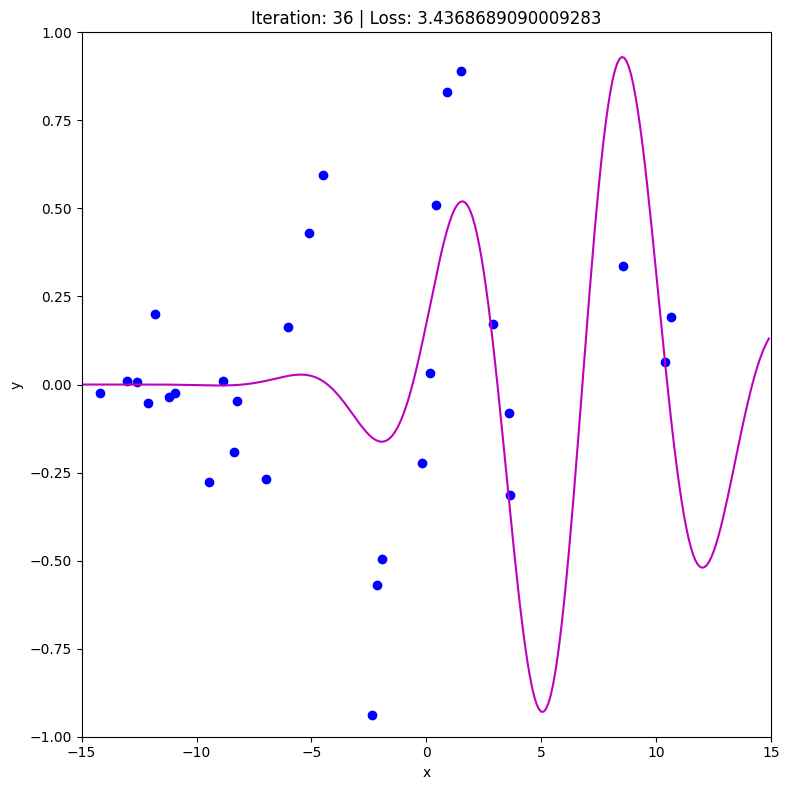

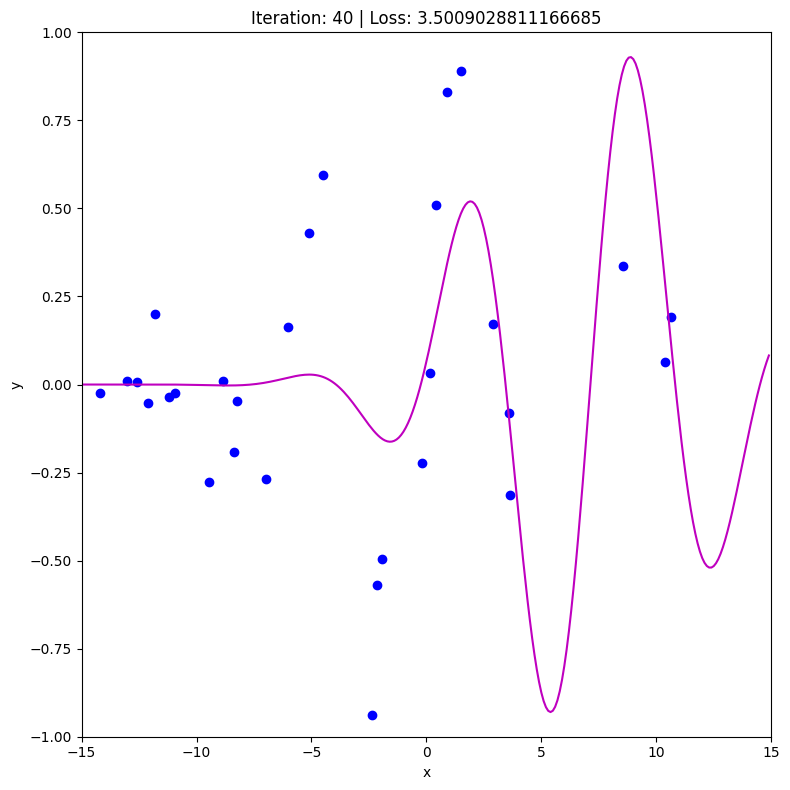

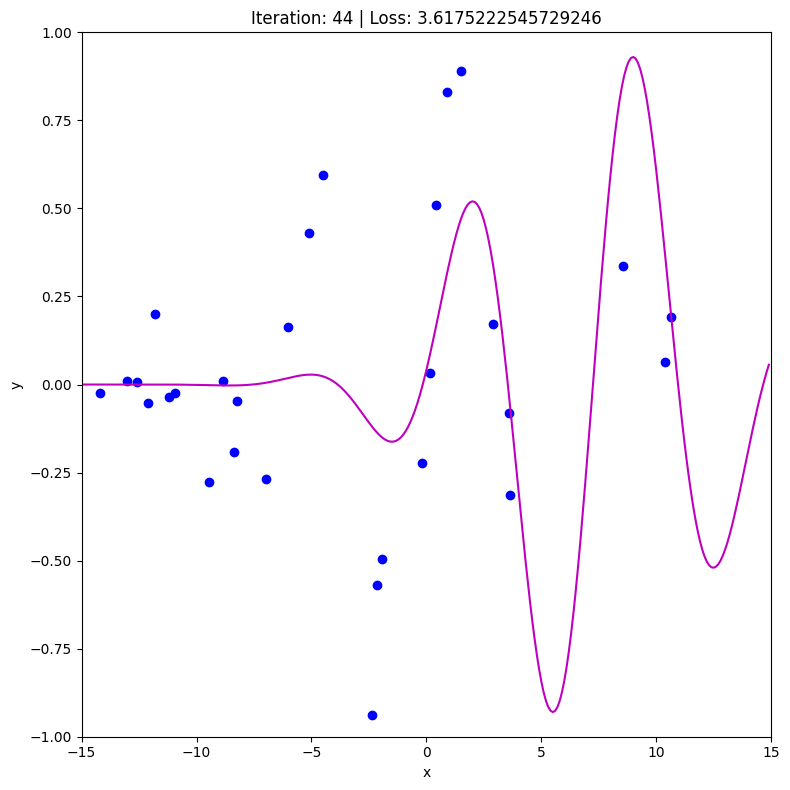

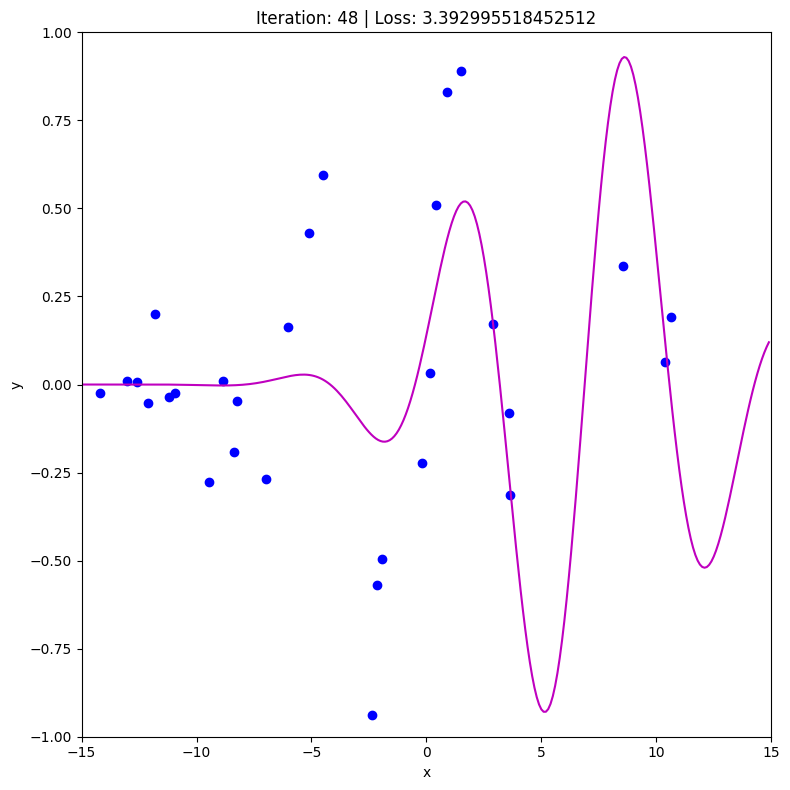

In [ ]:
for idx in range(steps):
  phiBase[:,idx+1:idx+2] = StochasticGradientDescent(phiBase[:,idx:idx+1],data[0,:],data[1,:],alpha=0.8,batchSize=5)
  if idx % 4 == 0:
    loss = ComputeLoss(data[0,:],data[1,:],ModelPrediction,phiBase[:,idx+1:idx+2])
    DrawModel(data,ModelPrediction,phiBase[:,idx+1],f"Iteration: {idx} | Loss: {loss}")

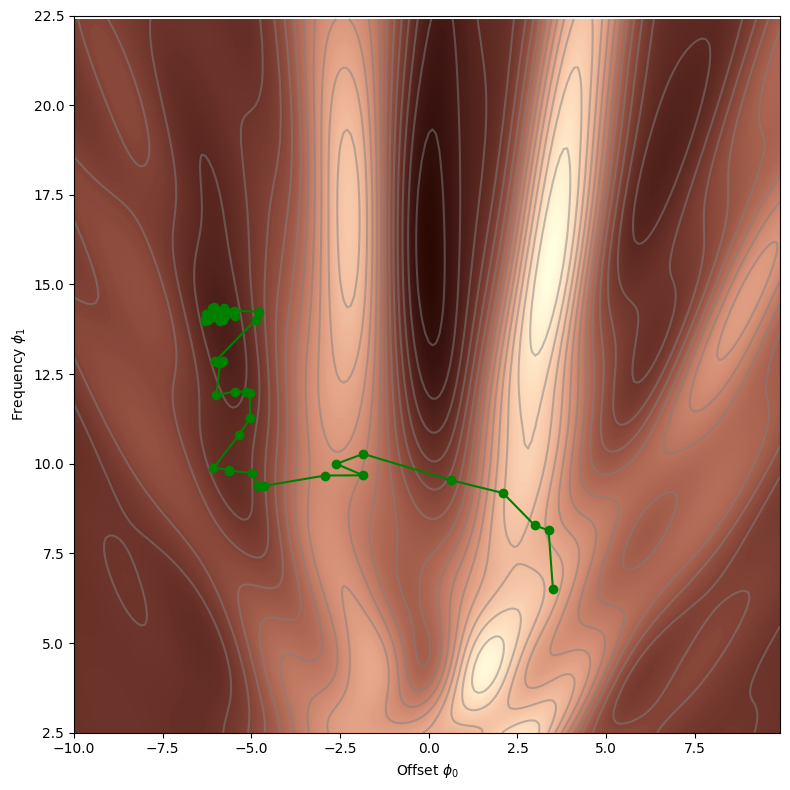

In [ ]:
DrawLossFunctions(ComputeLoss,data,ModelPrediction,phiBase)